# Task 2. Credit card

Взять данные по [ссылке](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) и:

- Провести разведочный анализ данных
    - какие зависимости в данных?
    - [сбалансированы](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset) ли классы?
    - основные статистики признаков
- Разделить данные на train/test
    - разделить на обучающую и тестовую подвыборки
    - сравнить статистики подвыборок и генеральной выборки
- Обучить модели классификации
    - какие метрики точности?
    - какая модель лучше всего справилась?

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Загрузка данных
df = pd.read_csv('creditcard.csv')

# Разведочный анализ данных (о'_0)
Зависимости между данными:

In [4]:
# Просмотр первых строк данных
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Данные содержат время совершения платежа Time, параметоры V_i, i=1...28, сумму платежа Amount, а также Class со значением 0, если операция честная, 1, если операция мошенническая. 

In [5]:
# Общая информация: количество записей, количество непропущенных значений в каждом столбце, типы данных столбцов и использование памяти
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Проверка наличия пропущенных значений и их количества 
df.isnull().sum().sum()

0

In [7]:
# Проверка наличия дубликатов и их количества
df.duplicated().sum()

1081

In [8]:
# Удаление 1080 дубликатов
df_no_duplicates = df.drop_duplicates()

# Проверка результата
df_no_duplicates.shape

(283726, 31)

In [9]:
# Изменение исходного DataFrame
df.drop_duplicates(inplace=True)

<Axes: >

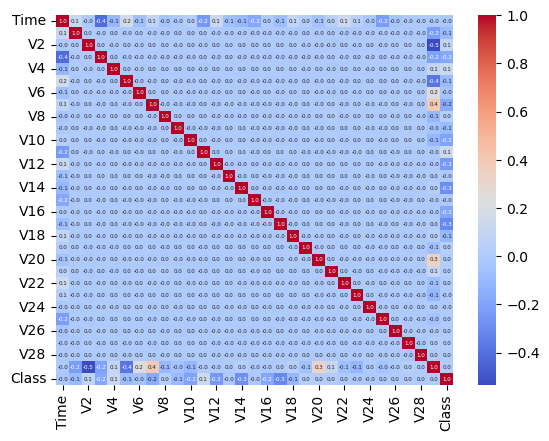

In [10]:
# Корреляция сбалансированной выборки
corr_map = df_no_duplicates.corr()
sns.heatmap(corr_map, annot=True, fmt='.1f', annot_kws={'size': 4}, cmap='coolwarm')

In [ ]:
# Визуализация попарных отношений между выбранными числовыми признаками и целевой переменной Class
# cols = ['Time', 'Amount', 'V1', 'V2', 'V3', 'Class']
# sns_plot = sns.pairplot(df_no_duplicates[cols], hue='Class')

Сбалансированность классов:

In [10]:
# Проверка сбалансированности классов. Количество транзакций в классах 0 и 1
class_balance = df['Class'].value_counts()
class_balance

Class
0    283253
1       473
Name: count, dtype: int64

473 мошеннических операции

Класс 0: 99.83%
Класс 1: 0.17%


<Axes: xlabel='Class', ylabel='count'>

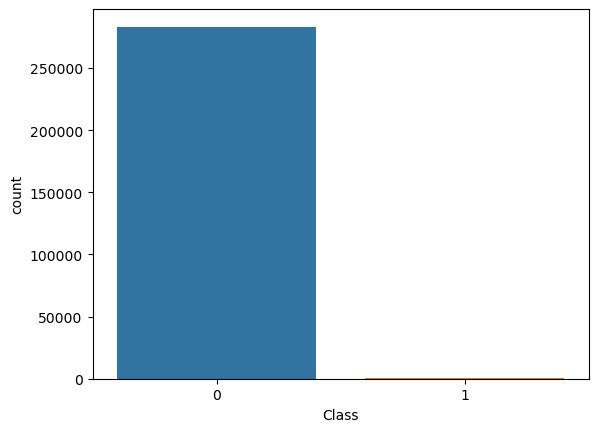

In [11]:
# Процентное соотношение классов и барплот
count_class_0, count_class_1 = df['Class'].value_counts()
print('Класс 0: {:.2f}%'.format((count_class_0 / (count_class_0 + count_class_1)) * 100))
print('Класс 1: {:.2f}%'.format((count_class_1 / (count_class_0 + count_class_1)) * 100))
sns.countplot(x='Class', data=df)

- Видно, что данные не сбалансированы.
- Верных транзакций 99.83 % базы данных, транзакций мошенников 0.17 %.

Основные статистики признаков:

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Разделение данных на train/test

Разделение на обучающую и тестовую подвыборки:

In [13]:
df.loc[(df['Class'] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
X = df.drop('Class', axis=1)
y = df['Class']
# Разделение данных на обучающую и тестовую выборки в соотношении 80 % и 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Значения в y_train и y_test
print('y_train:', y_train.unique(), '\n', 'y_test:', y_test.unique())

y_train: [0 1] 
 y_test: [0 1]


Сравнение статистики подвыборок и генеральной выборки:

In [16]:
# Cтатистики генеральной выборки
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
# Статистики обучающей выборки
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94768.301701,0.004945,-0.008038,0.002837,-0.003487,0.001121,-0.000331,0.001644,-0.002322,-0.002320,...,-0.001279,-0.000479,-0.000437,-0.000139,0.001379,-0.000447,0.000189,0.001817,0.000403,88.891034
std,47492.968156,1.952114,1.653140,1.509972,1.414851,1.388331,1.336201,1.238350,1.179120,1.095360,...,0.777297,0.729254,0.724815,0.629849,0.606012,0.521796,0.482728,0.399362,0.332830,252.056743
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-15.430084,0.000000
25%,54127.500000,-0.917012,-0.601451,-0.890968,-0.851752,-0.691171,-0.767972,-0.552417,-0.208972,-0.645195,...,-0.211330,-0.228509,-0.543046,-0.161731,-0.353966,-0.317620,-0.327014,-0.070632,-0.052852,5.740000
50%,84642.000000,0.019032,0.063784,0.182383,-0.022990,-0.055068,-0.274651,0.040543,0.022233,-0.052707,...,-0.062420,-0.029315,0.007332,-0.011301,0.041884,0.015654,-0.052325,0.001563,0.011324,22.150000
75%,139271.000000,1.316721,0.799293,1.028824,0.740668,0.611930,0.398165,0.570340,0.325836,0.597267,...,0.133394,0.185989,0.526694,0.147509,0.441176,0.350369,0.240324,0.091120,0.078323,77.960000
max,172792.000000,2.454930,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [18]:
# Cтатистики тестовой выборки
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,94982.178180,0.009807,0.011479,-0.003282,-0.000884,0.004653,-0.004372,0.002427,0.005015,0.001298,...,0.006050,0.000062,0.001672,0.001547,-0.004445,0.000625,-0.000009,0.001547,0.001124,86.799331
std,47433.370124,1.931601,1.620619,1.503514,1.411525,1.330765,1.314718,1.183968,1.178783,1.096028,...,0.739991,0.702132,0.723494,0.598487,0.604065,0.518916,0.479349,0.380931,0.308069,243.652630
min,2.000000,-41.928738,-60.464618,-32.965346,-5.231828,-29.730600,-20.054615,-23.928661,-50.943369,-9.283925,...,-25.222345,-22.889347,-9.499423,-32.828995,-2.822384,-8.696627,-2.604551,-9.793568,-8.310167,0.000000
25%,54442.750000,-0.911393,-0.594862,-0.884606,-0.843996,-0.685703,-0.773421,-0.553347,-0.208220,-0.640244,...,-0.211887,-0.227487,-0.541004,-0.161503,-0.356836,-0.317028,-0.325674,-0.070646,-0.052753,5.380000
50%,84914.500000,0.026533,0.064324,0.171057,-0.019479,-0.047885,-0.277387,0.041637,0.020713,-0.050677,...,-0.062051,-0.029911,0.004156,-0.010510,0.037127,0.018532,-0.051406,0.001071,0.011163,21.350000
75%,139404.000000,1.314234,0.804234,1.020144,0.735973,0.613853,0.390783,0.571108,0.325229,0.590537,...,0.132433,0.187200,0.534873,0.148450,0.434112,0.351938,0.239953,0.091671,0.078081,76.000000
max,172778.000000,2.422508,18.183626,4.187811,16.875344,29.016124,21.307738,31.527244,19.168327,10.348407,...,38.117209,22.614889,7.248763,19.228169,3.990646,5.541598,3.039297,9.879903,15.870474,18910.000000


In [19]:
y_test.describe()

count    56746.000000
mean         0.001639
std          0.040450
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [20]:
y_train.describe()

count    226980.000000
mean          0.001674
std           0.040882
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

Статистики генеральной, обучающей и тестовой выборок схожи

# Обучение модели классификации

Алгоритм KNN (KNeighborsClassifier)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# используемые метрики точности
from sklearn.metrics import accuracy_score, precision_score, recall_score

import time

In [22]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [23]:
# Объект класса KNN с параметром n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Времяи обучения
start_time = time.time() 

# Обучение модели
knn.fit(X_train, y_train)

end_time = time.time()
training_time_knn = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred = knn.predict(X_test)

end_time = time.time()
predicting_time_knn = end_time - start_time

In [24]:
# Вычисление метрик точности
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)

In [25]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_knn),
      'Точность модели (precision score): {:.3%}'.format(precision_knn),
      'Полнота модели (recall score): {:.3%}'.format(recall_knn),
      'Время обучения модели: {:.3f} секунд'.format(training_time_knn),
      'Время прогноза: {:.3f} секунд'.format(predicting_time_knn), sep='\n')

Точность модели (accuracy score): 99.845%
Точность модели (precision score): 100.000%
Полнота модели (recall score): 5.376%
Время обучения модели: 0.045 секунд
Время прогноза: 21.816 секунд


Логистическая регрессия

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Объект класса LogisticRegression
logreg = LogisticRegression(random_state=21, max_iter=1000, multi_class='multinomial')

# Время обучения
start_time = time.time()

# Обучение модели
logreg.fit(X_train, y_train)

end_time = time.time()
training_time_logreg = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred_logreg = logreg.predict(X_test)

end_time = time.time()
predicting_time_logreg = end_time - start_time

# Вычисление метрик точности
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

In [30]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_logreg),
      'Точность модели (precision score): {:.3%}'.format(precision_logreg),
      'Полнота модели (recall score): {:.3%}'.format(recall_logreg),
      'Время обучения модели: {:.3f} секунд'.format(training_time_logreg),
      'Время прогноза: {:.3f} секунд'.format(predicting_time_logreg), sep='\n')

Точность модели (accuracy score): 99.921%
Точность модели (precision score): 84.286%
Полнота модели (recall score): 63.441%
Время обучения модели: 6.990 секунд
Время прогноза: 0.000 секунд


In [38]:
# !pip install catboost
from catboost import CatBoostClassifier

In [39]:
# Объект класса CatBoostClassifier
catboost = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss', random_state=42)

# Время обучения
start_time = time.time()

# Обучение модели
catboost.fit(X_train, y_train, verbose=0)

end_time = time.time()
training_time_catboost = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred_catboost = catboost.predict(X_test)

end_time = time.time()
predicting_time_catboost = end_time - start_time

# Вычисление метрик точности
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

In [40]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_catboost),
      'Точность модели (precision score): {:.3%}'.format(precision_catboost),
      'Полнота модели (recall score): {:.3%}'.format(recall_catboost),
      'Время обучения модели: {:.3f} секунд'.format(training_time_catboost),
      'Время прогноза: {:.3f} секунд'.format(predicting_time_catboost), sep='\n')

Точность модели (accuracy score): 99.954%
Точность модели (precision score): 94.667%
Полнота модели (recall score): 76.344%
Время обучения модели: 15.211 секунд
Время прогноза: 0.049 секунд


RandomOverSampler

Использование RandomOverSampler и RandomUnderSampler

In [27]:
# !pip install -U imbalanced-learn, перезапустить ядро
from imblearn.over_sampling import RandomOverSampler, RandomUnderSampler

# Функция для оценки модели
def evaluate_model(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Создание списка для записи результатов
results_list = []

# Исходые данные
accuracy, precision, recall = evaluate_model(X_train, y_train, X_test, y_test)
results_list.append({'Sampling Method': 'Original', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)
accuracy, precision, recall = evaluate_model(X_oversampled, y_oversampled, X_test, y_test)
results_list.append({'Sampling Method': 'Oversampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)
accuracy, precision, recall = evaluate_model(X_undersampled, y_undersampled, X_test, y_test)
results_list.append({'Sampling Method': 'Undersampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Создание DataFrame из списка результатов
results_table = pd.DataFrame(results_list)

# Вывод результатов
print(results_table)


  Sampling Method  Accuracy  Precision    Recall
0        Original  0.998449   0.571429  0.044944
1    Oversampling  0.997762   0.212121  0.157303
2   Undersampling  0.666426   0.003060  0.651685


Какая модель лучше всего справилась?

Судя по метрикам, лучший результат показал CatBoostClassifier, однако при этом он имеет самое большое время обучения модели.

Среди RandomOverSampler и RandomUnderSampler лучший результат имеет RandomOverSampler.

# Исправления

1. Добавить модели SVM и DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Создание модели DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=21)

# Время обучения
start_time = time.time()
dtc_model.fit(X_train, y_train)
end_time = time.time()
training_time_dtc = end_time - start_time

# Прогноз
start_time = time.time()
y_pred_dtc = dtc_model.predict(X_test)
end_time = time.time()
predicting_time_dtc = end_time - start_time

# Оценка модели DecisionTreeClassifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, zero_division=1)
recall_dtc = recall_score(y_test, y_pred_dtc)

# Вывод результатов для модели DecisionTreeClassifier
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_dtc),
      'Точность модели (precision score): {:.3%}'.format(precision_dtc),
      'Полнота модели (recall score): {:.3%}'.format(recall_dtc),
      'Время обучения модели: {:.3f} секунд'.format(training_time_dtc),
      'Время прогноза: {:.3f} секунд'.format(predicting_time_dtc), sep='\n')


Точность модели (accuracy score): 99.910%
Точность модели (precision score): 71.875%
Полнота модели (recall score): 74.194%
Время обучения модели: 29.129 секунд
Время прогноза: 0.010 секунд


In [46]:
from sklearn.svm import SVC

# Создание модели LinearSVC (эквивалентно SVC с линейным ядром)
linear_svc_model = SVC(kernel='linear', random_state=21)

# Время обучения
start_time = time.time()
linear_svc_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Прогноз
start_time = time.time()
y_pred_linear_svc = linear_svc_model.predict(X_test)
end_time = time.time()
predicting_time = end_time - start_time

# Оценка модели LinearSVC
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
precision_linear_svc = precision_score(y_test, y_pred_linear_svc, zero_division=1)
recall_linear_svc = recall_score(y_test, y_pred_linear_svc)

# Вывод результатов для модели LinearSVC
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_linear_svc),
      'Точность модели (precision score): {:.3%}'.format(precision_linear_svc),
      'Полнота модели (recall score): {:.3%}'.format(recall_linear_svc),
      'Время обучения модели: {:.3f} секунд'.format(training_time),
      'Время прогноза: {:.3f} секунд'.format(predicting_time), sep='\n')


Точность модели (accuracy score): 99.873%
Точность модели (precision score): 73.333%
Полнота модели (recall score): 35.484%
Время обучения модели: 381.918 секунд
Время прогноза: 0.834 секунд


2. Свести в единую таблицу результаты всех моделей

In [47]:
# Создание DataFrame с результатами
results_df = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'LogisticRegression', 'CatBoostClassifier', 'LinearSVC', 'DecisionTreeClassifier'],
    'Accuracy': [accuracy_knn, accuracy_logreg, accuracy_catboost, accuracy_linear_svc, accuracy_dtc],
    'Precision': [precision_knn, precision_logreg, precision_catboost, precision_linear_svc, precision_dtc],
    'Recall': [recall_knn, recall_logreg, recall_catboost, recall_linear_svc, recall_dtc],
    'Training Time': [training_time_knn, training_time_logreg, training_time_catboost, training_time, training_time_dtc],
    'Predicting Time': [predicting_time_knn, predicting_time_logreg, predicting_time_catboost, predicting_time, predicting_time_dtc]
})

# Вывод DataFrame
print(results_df)


                    Model  Accuracy  Precision    Recall  Training Time  \
0    KNeighborsClassifier  0.998449   1.000000  0.053763       0.045426   
1      LogisticRegression  0.999207   0.842857  0.634409       6.989911   
2      CatBoostClassifier  0.999542   0.946667  0.763441      15.211034   
3               LinearSVC  0.998731   0.733333  0.354839     381.918228   
4  DecisionTreeClassifier  0.999101   0.718750  0.741935      29.128753   

   Predicting Time  
0        21.816293  
1         0.000000  
2         0.049006  
3         0.834039  
4         0.010000  


3. Запустить обученные на сэмплированных данных модели на исходной выборке - что происходит с метриками точности?

In [33]:
# Предсказание на исходной выборке для KNeighborsClassifier
X = df.drop('Class', axis=1).values 
y = df['Class']
knn_X = knn.predict(X)
print('Точность модели (accuracy score):', accuracy_score(y, knn_X),
      'Точность модели (precision score):', precision_score(y, knn_X),
      'Полнота модели (recall score):', recall_score(y, knn_X), sep='\n')

Точность модели (accuracy score):
0.9985619929086513
Точность модели (precision score):
1.0
Полнота модели (recall score):
0.13742071881606766


In [41]:
# Предсказание на исходной выборке для CatBoostClassifier
catboost_X = catboost.predict(X)
print('Точность модели (accuracy score):', accuracy_score(y, catboost_X),
      'Точность модели (precision score):', precision_score(y, catboost_X),
      'Полнота модели (recall score):', recall_score(y, catboost_X), sep='\n')

Точность модели (accuracy score):
0.9997779547873653
Точность модели (precision score):
0.9904306220095693
Полнота модели (recall score):
0.8752642706131079


In [45]:
# Предсказание на исходной выборке для DecisionTreeClassifier
dtc_model_X = dtc_model.predict(X)
print('Точность модели (accuracy score):', accuracy_score(y, dtc_model_X),
      'Точность модели (precision score):', precision_score(y, dtc_model_X),
      'Полнота модели (recall score):', recall_score(y, dtc_model_X), sep='\n')

Точность модели (accuracy score):
0.9998202491135814
Точность модели (precision score):
0.9432773109243697
Полнота модели (recall score):
0.9492600422832981


Можно заметить, что при запуске моделей (KNeighborsClassifier, CatBoostClassifier, DecisionTreeClassifier) на исходной выборке метрики точности (accuracy score, precision score, recall score) увеличились относительно метрик, полученных на тестовой выборке.